# Encoding the Train dataset without popularity = 0

This iteration reflects that the dataset has been split into two entries with popularity > 0 and entries with popularity = 0. These two datasets have been saved as csv files on the S3 bucket and will be used in this notebook. 

In [1]:
# Import the necessary libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# Load the dataset from csv file.
df_train = pd.read_csv('s3://flutz-bucket/spotify/no_pop0_train.csv', sep=",", header=0, index_col=0)
df_train.head()

,artist_name,track_name,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
track_id,,,,,,,,,,,,,,,,
2b8fOow8UzyDFAE27YhOZM,Maroon 5,Memories,100,0.764,0.320,11,-7.209,1,0.0546,0.8370,0.000000,0.0822,0.5750,91.019,189486,4
21jGcNKet2qwijlDFuPiPb,Post Malone,Circles,99,0.695,0.762,0,-3.497,1,0.0395,0.1920,0.002440,0.0863,0.5530,120.042,215280,4
3eekarcy7kvN4yt5ZFzltW,Travis Scott,HIGHEST IN THE ROOM,98,0.598,0.427,7,-8.764,0,0.0317,0.0546,0.000006,0.2100,0.0605,76.469,175721,4
3ZCTVFBt2Brf31RLEnCkWJ,Billie Eilish,everything i wanted,98,0.704,0.225,6,-14.454,0,0.0994,0.9020,0.657000,0.1060,0.2430,120.006,245426,4
2XU0oxnq2qxCpomAAuJY8K,Tones and I,Dance Monkey,98,0.824,0.588,6,-6.400,0,0.0924,0.6920,0.000104,0.1490,0.5130,98.027,209438,4


# Data Wrangling part 2
Prepare the data for clustering methods.
Non-numerical columns will be dropped

In [3]:
num_cols = ['popularity', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms', 'time_signature']

In [4]:
X = df_train[num_cols]
display(X)

,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
track_id,,,,,,,,,,,,,,
2b8fOow8UzyDFAE27YhOZM,100,0.764,0.3200,11,-7.209,1,0.0546,0.8370,0.000000,0.0822,0.5750,91.019,189486,4
21jGcNKet2qwijlDFuPiPb,99,0.695,0.7620,0,-3.497,1,0.0395,0.1920,0.002440,0.0863,0.5530,120.042,215280,4
3eekarcy7kvN4yt5ZFzltW,98,0.598,0.4270,7,-8.764,0,0.0317,0.0546,0.000006,0.2100,0.0605,76.469,175721,4
3ZCTVFBt2Brf31RLEnCkWJ,98,0.704,0.2250,6,-14.454,0,0.0994,0.9020,0.657000,0.1060,0.2430,120.006,245426,4
2XU0oxnq2qxCpomAAuJY8K,98,0.824,0.5880,6,-6.400,0,0.0924,0.6920,0.000104,0.1490,0.5130,98.027,209438,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
03vuaTVYJPa0Rm6EZqEqmL,1,0.512,0.2110,5,-15.158,1,0.0634,0.9620,0.000080,0.1250,0.2000,74.950,171160,4
03LbCv36dXuirURCkpxN48,1,0.151,0.0697,2,-21.872,1,0.0455,0.9100,0.855000,0.0770,0.0915,181.282,449813,3
02Xv3o9MVLgmfVOQMlrD45,1,0.354,0.1480,10,-21.075,1,0.0440,0.9910,0.925000,0.0984,0.3560,175.001,363000,3


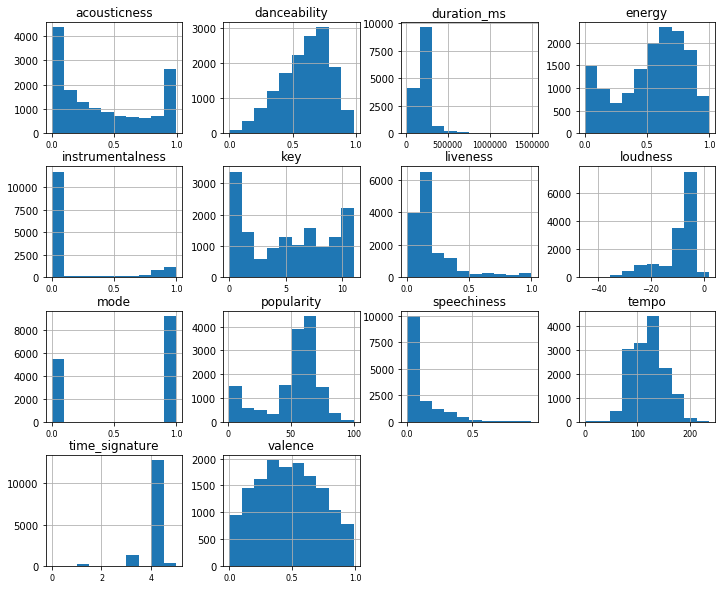

In [5]:
# For clarity the columns will be displayed as a histogram
X.hist(xlabelsize=8, figsize=(12,10));

# Encoding

From the table it is clear that the value ranges of the columns: popularity, key, loudness, tempo, duration_ms and time_signature exceed 0 and 1.
These columns therefore need to be scaled.

In [6]:
# Define the columns requiring scaling
scale_col = ['popularity', 'key', 'loudness', 'tempo', 'duration_ms', 'time_signature']

In [7]:
# Scaling
for col in [scale_col]:
    X[col] = ((X[col] - X[col].min()) / (X[col].max() - X[col].min()))


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/pandas/core/frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


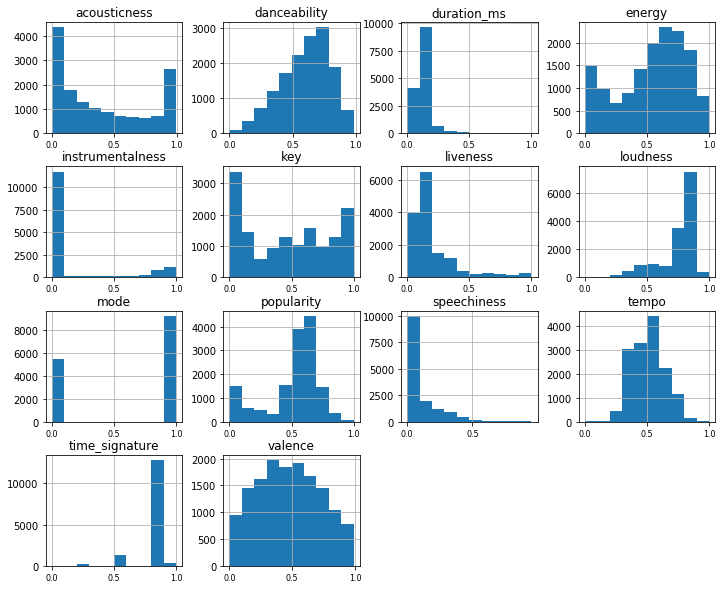

In [8]:
# Using the histogram, check that the scaling has worked
X.hist(xlabelsize=8, figsize=(12,10));

Conclusion: Yes, the scaling worked - all values range between 0 and 1. No progress to Clustering

In [9]:
# Now after encoding save the DataFrame to S3 for the clustering process
X.to_csv('s3://flutz-bucket/spotify/no_pop0_train_encoded.csv', sep=",", header=True)